<a href="https://colab.research.google.com/github/itzrnvr/opencv-labs/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task-1: Perform Image Compression Operations

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
IMG_SRC = 'picture2.jpg'
IMG_LOSSY = 'lossy_image.jpg'
IMG_LOSSLESS = 'lossless_image.png'

In [3]:
img_raw = cv2.imread(IMG_SRC)

In [4]:
img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

In [5]:
cv2.imwrite(IMG_LOSSY, img_raw, [cv2.IMWRITE_JPEG_QUALITY, 50])
cv2.imwrite(IMG_LOSSLESS, img_raw, [cv2.IMWRITE_PNG_COMPRESSION, 9])
cr_img_lossy = Image.open(IMG_LOSSY)
cr_img_lossless = Image.open(IMG_LOSSLESS)

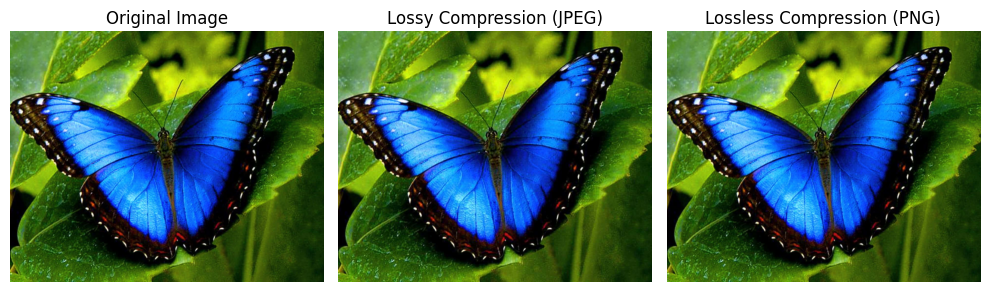

In [6]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cr_img_lossy)
plt.title('Lossy Compression (JPEG)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cr_img_lossless)
plt.title('Lossless Compression (PNG)')
plt.axis('off')
plt.tight_layout()
plt.show()

## Task-2: Apply Convolutional Neural Networks (CNN)

### Part 1: Train CNN on the MNIST Dataset

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [8]:
(_X_TRAIN, _Y_TRAIN), (_X_TEST, _Y_TEST) = mnist.load_data()
X_MNIST = _X_TRAIN.reshape(-1, 28, 28, 1).astype('float32') / 255
X_MNIST_TEST = _X_TEST.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_MNIST = to_categorical(_Y_TRAIN)
Y_MNIST_TEST = to_categorical(_Y_TEST)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
net = Sequential()
net.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
net.add(MaxPooling2D((2, 2)))
net.add(Conv2D(64, (3, 3), activation='relu'))
net.add(MaxPooling2D((2, 2)))
net.add(Flatten())
net.add(Dense(128, activation='relu'))
net.add(Dense(10, activation='softmax'))
net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
his = net.fit(X_MNIST, Y_MNIST, validation_data=(X_MNIST_TEST, Y_MNIST_TEST), epochs=50, batch_size=128)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8457 - loss: 0.5193 - val_accuracy: 0.9781 - val_loss: 0.0661
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9816 - loss: 0.0619 - val_accuracy: 0.9874 - val_loss: 0.0374
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9887 - loss: 0.0385 - val_accuracy: 0.9859 - val_loss: 0.0390
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9897 - loss: 0.0316 - val_accuracy: 0.9899 - val_loss: 0.0301
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9938 - loss: 0.0214 - val_accuracy: 0.9914 - val_loss: 0.0260
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9894 - val_loss: 0.0322
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9957 - loss: 0.0136 - val_accuracy: 0.9913 - val_loss: 0.0275
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9959 - loss: 0.0117 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


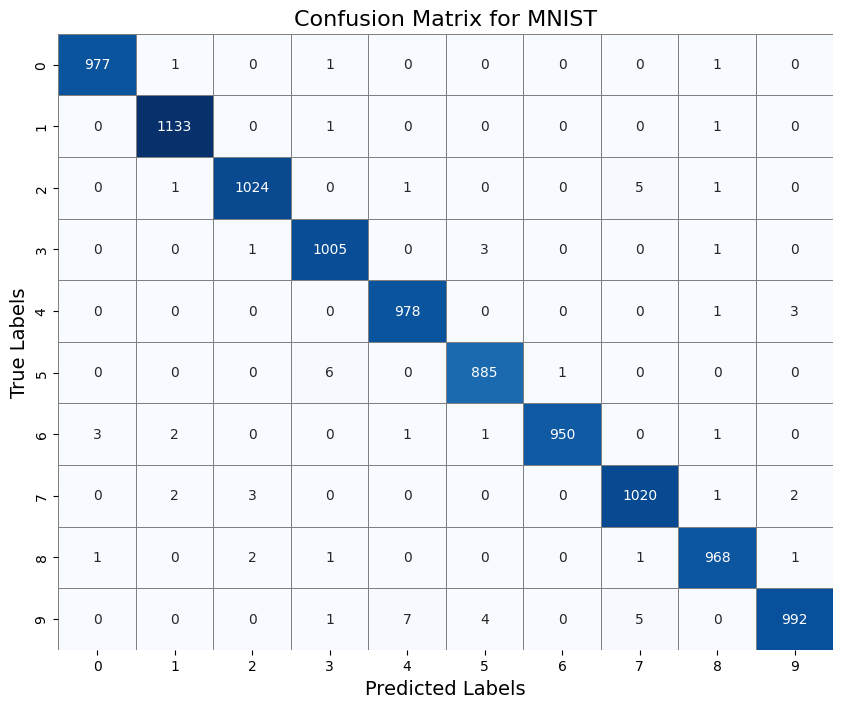

Classification Report:
               precision    recall  f1-score   support

           0     0.9959    0.9969    0.9964       980
           1     0.9947    0.9982    0.9965      1135
           2     0.9942    0.9922    0.9932      1032
           3     0.9901    0.9950    0.9926      1010
           4     0.9909    0.9959    0.9934       982
           5     0.9910    0.9922    0.9916       892
           6     0.9989    0.9916    0.9953       958
           7     0.9893    0.9922    0.9908      1028
           8     0.9928    0.9938    0.9933       974
           9     0.9940    0.9832    0.9885      1009

    accuracy                         0.9932     10000
   macro avg     0.9932    0.9931    0.9932     10000
weighted avg     0.9932    0.9932    0.9932     10000

Accuracy: 99.32%


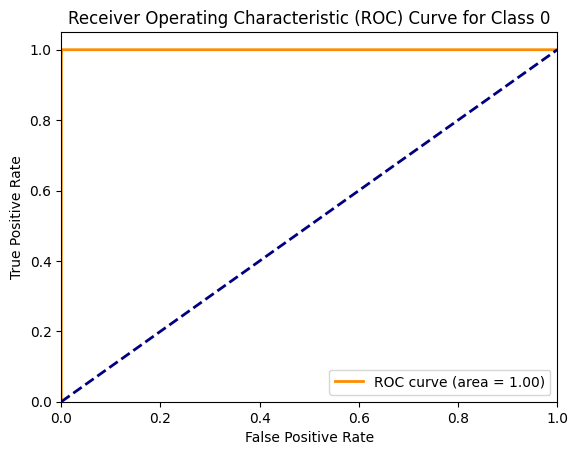

Overall AUC Score: 0.9999


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import numpy as np
import seaborn as sns
pred_mnist = net.predict(X_MNIST_TEST)
mnist_pred_lbl = np.argmax(pred_mnist, axis=1)
mnist_true_lbl = np.argmax(Y_MNIST_TEST, axis=1)
mat_mnist = confusion_matrix(mnist_true_lbl, mnist_pred_lbl)
plt.figure(figsize=(10, 8))
sns.heatmap(mat_mnist, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix for MNIST', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()
rep_mnist = classification_report(mnist_true_lbl, mnist_pred_lbl, digits=4)
print('Classification Report:\n', rep_mnist)
acc_mnist = np.sum(mnist_true_lbl == mnist_pred_lbl) / len(mnist_true_lbl)
print(f'Accuracy: {acc_mnist * 100:.2f}%')
fpr_dict = dict()
tpr_dict = dict()
roc_auc_dict = dict()
for ind in range(10):
    fpr_dict[ind], tpr_dict[ind], _ = roc_curve(Y_MNIST_TEST[:, ind], pred_mnist[:, ind])
    roc_auc_dict[ind] = auc(fpr_dict[ind], tpr_dict[ind])
plt.figure()
plt.plot(fpr_dict[0], tpr_dict[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dict[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc='lower right')
plt.show()
auc_value_mnist = roc_auc_score(Y_MNIST_TEST, pred_mnist, average='macro')
print(f'Overall AUC Score: {auc_value_mnist:.4f}')

### Part 2: Train CNN on the CIFAR-10 Dataset

In [12]:
from keras.datasets import cifar10
(cifarx_train, cifary_train), (cifarx_test, cifary_test) = cifar10.load_data()
cifarx_train = cifarx_train.astype('float32') / 255
cifarx_test = cifarx_test.astype('float32') / 255
from keras.utils import to_categorical
cifary_train = to_categorical(cifary_train)
cifary_test = to_categorical(cifary_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [13]:
cnn_cifar = Sequential()
cnn_cifar.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_cifar.add(MaxPooling2D((2, 2)))
cnn_cifar.add(Conv2D(64, (3, 3), activation='relu'))
cnn_cifar.add(MaxPooling2D((2, 2)))
cnn_cifar.add(Flatten())
cnn_cifar.add(Dense(128, activation='relu'))
cnn_cifar.add(Dense(10, activation='softmax'))
cnn_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cifar_history = cnn_cifar.fit(cifarx_train, cifary_train, validation_data=(cifarx_test, cifary_test), epochs=50, batch_size=128)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3605 - loss: 1.7631 - val_accuracy: 0.5382 - val_loss: 1.3015
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5577 - loss: 1.2434 - val_accuracy: 0.5896 - val_loss: 1.1674
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6102 - loss: 1.1077 - val_accuracy: 0.6314 - val_loss: 1.0628
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6437 - loss: 1.0112 - val_accuracy: 0.6521 - val_loss: 0.9950
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6783 - loss: 0.9271 - val_accuracy: 0.6573 - val_loss: 0.9852
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6957 - loss: 0.8714 - val_accuracy: 0.6664 - val_loss: 0.9633
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7129 - loss: 0.8284 - val_accuracy: 0.6884 - val_loss: 0.9089
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7352 - loss: 0.7611 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


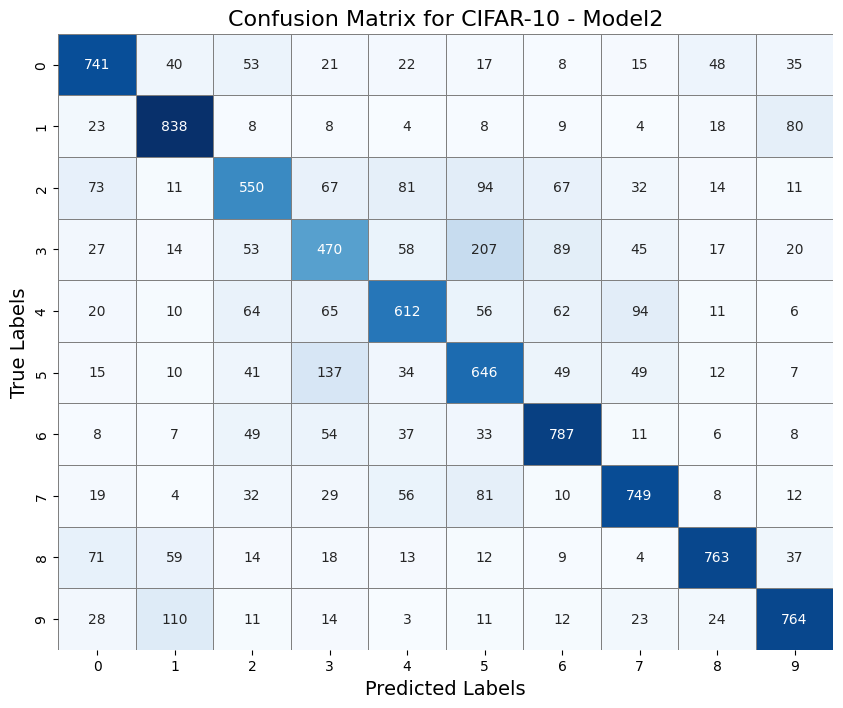

Classification Report:
               precision    recall  f1-score   support

           0     0.7229    0.7410    0.7319      1000
           1     0.7597    0.8380    0.7970      1000
           2     0.6286    0.5500    0.5867      1000
           3     0.5323    0.4700    0.4992      1000
           4     0.6652    0.6120    0.6375      1000
           5     0.5545    0.6460    0.5968      1000
           6     0.7142    0.7870    0.7488      1000
           7     0.7300    0.7490    0.7394      1000
           8     0.8284    0.7630    0.7944      1000
           9     0.7796    0.7640    0.7717      1000

    accuracy                         0.6920     10000
   macro avg     0.6915    0.6920    0.6903     10000
weighted avg     0.6915    0.6920    0.6903     10000

Accuracy: 69.20%


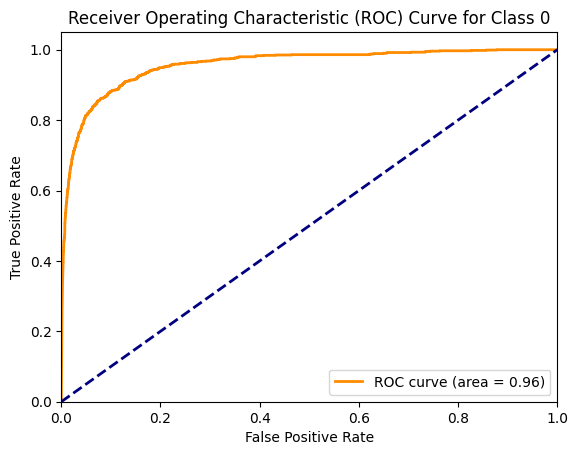

Overall AUC Score: 0.9463


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import numpy as np
import seaborn as sns
pred_cifar = cnn_cifar.predict(cifarx_test)
cifar_pred_lbl = np.argmax(pred_cifar, axis=1)
cifar_true_lbl = np.argmax(cifary_test, axis=1)
mat_cifar = confusion_matrix(cifar_true_lbl, cifar_pred_lbl)
plt.figure(figsize=(10, 8))
sns.heatmap(mat_cifar, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title('Confusion Matrix for CIFAR-10 - Model2', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()
rep_cifar = classification_report(cifar_true_lbl, cifar_pred_lbl, digits=4)
print('Classification Report:\n', rep_cifar)
acc_cifar = np.sum(cifar_true_lbl == cifar_pred_lbl) / len(cifar_true_lbl)
print(f'Accuracy: {acc_cifar * 100:.2f}%')
fpr_cifar = dict()
tpr_cifar = dict()
roc_auc_cifar = dict()
for ind in range(10):
    fpr_cifar[ind], tpr_cifar[ind], _ = roc_curve(cifary_test[:, ind], pred_cifar[:, ind])
    roc_auc_cifar[ind] = auc(fpr_cifar[ind], tpr_cifar[ind])
plt.figure()
plt.plot(fpr_cifar[0], tpr_cifar[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_cifar[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc='lower right')
plt.show()
auc_value_cifar = roc_auc_score(cifary_test, pred_cifar, average='macro')
print(f'Overall AUC Score: {auc_value_cifar:.4f}')